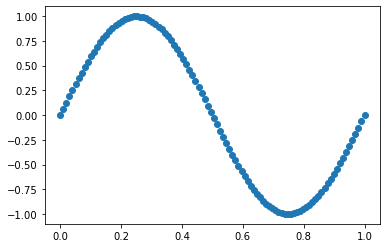

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

#标准曲线
x = np.linspace(0,1,100)  #在0-1之间，均分产生100个数据点
t = np.sin(2*np.pi*x)   #我们的目标函数是sin。
plt.scatter(x,t)  

#后续部分才是正文，会通过二项式拟合，加入高斯噪声的点来反过来，拟合生成该目标函数。

In [18]:
#采样函数
def get_data(N):
    print('ddd')
    x_n = np.linspace(0,1,N)
    t_n = np.sin(2 *np.pi*x_n) + np.random.normal(scale=0.15,size=N)
    return x_n, t_n

font = {'family':'Times New Roman','size':20}
def draw_ticks():
    plt.tick_params(labelsize=15)
    plt.xticks(np.linspace(0,1,2))
    plt.yticks(np.linspace(-1,1,3))
    plt.ylim(-1.5,1.5)
    
    plt.xlabel('x',font)
    plt.ylabel('t',font, rotation='horizontal')



ddd


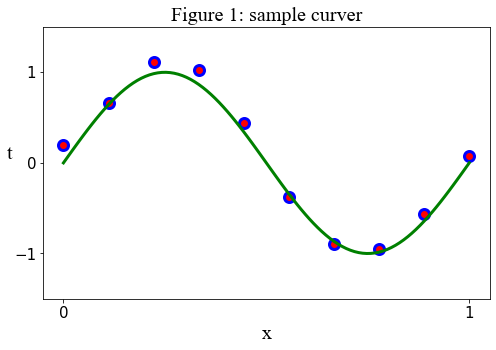

In [36]:
x_10, t_10 = get_data(10)
plt.figure(1, figsize=(8,5))
 #目标函数的数据
plt.plot(x,t,'green',linewidth=3) 
#加入了高斯噪声产生的数据，可以通过图看到分布在目标函数周围
plt.scatter(x_10,t_10,color='red',marker='o',edgecolors='b', s=100,linewidths=3, label='training data')
draw_ticks()
plt.title('Figure 1: sample curver', font)
plt.savefig('1.png', dpi=400)

#绿色的曲线为我们需要拟合的曲线，现在通过已有的添加了噪声的数据点作为训练数据
#利用二项式进行拟合  y(x,w)=w0 + w1*x + w2*x*x + w3*x*x*X ... + wM*x的M次方
#使用均方误差作为误差函数对拟合出的多项式进行评估，公式如下：
拟合数据的目的即为最小化误差函数

![图](./NotDelete_showAvg.JPG)

------M=3, N=10-------
W:
[  0.08957949  10.62030638 -32.30768327  21.74289142]


C:\Users\a\AppData\Local\conda\conda\envs\test_py3\lib\site-packages\ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
C:\Users\a\AppData\Local\conda\conda\envs\test_py3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 65306 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\a\AppData\Local\conda\conda\envs\test_py3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 65306 missing from current font.
  font.set_text(s, 0, flags=flags)


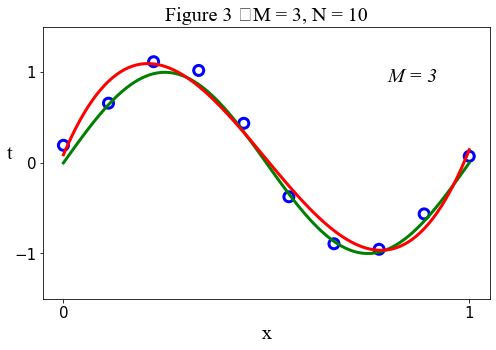

In [57]:
def regress(M,N,x,x_n,t_n, lamda=0):
    print('------M=%d, N=%d-------' % (M,N))
    order = np.arange(M+1)
    order = order[:,np.newaxis]
    e = np.tile(order, [1,N])
    XT = np.power(x_n,e)
    X = np.transpose(XT)
    a = np.matmul(XT,X)+lamda*np.identity(M+1)
    b = np.matmul(XT, t_n)
    w = np.linalg.solve(a,b)
    print('W:')
    print(w)
    e2 = np.tile(order, [1,x.shape[0]])
    XT2 = np.power(x, e2)
    p = np.matmul(w, XT2)
    return p


#红色的线为根据点拟合的线，M不同，拟合的线不同。
#可以看到，和目标函数表示的线很接近。
#3阶基本可以拟合，如果为9可能过拟合。0，1则欠拟合。
#因为数据只有10个，所以拟合效果还不是很满意，提高数据点，可以提高拟合效果
#M=3
p = regress(3, 10, x, x_10,t_10)
plt.figure(2, figsize=(8,5))
#画两条曲线

plt.plot(x,t,'green',x,p,'red',linewidth=3)
#散点，将原始训练数据显示出
plt.scatter(x_10,t_10,color='',marker='o',edgecolors='b', s=100,linewidths=3, label='training data')
draw_ticks()
plt.title('Figure 3 ：M = 3, N = 10', font)
plt.text(0.8,0.9,'M = 3', font, style='italic')
plt.savefig('3.png', dpi = 400)


ddd
------M=9, N=100-------
W:
[-7.63881989e-03  1.26781269e+01 -1.27396826e+02  9.85353307e+02
 -4.44464532e+03  1.15781404e+04 -1.83719481e+04  1.77003910e+04
 -9.51262715e+03  2.18015467e+03]


C:\Users\a\AppData\Local\conda\conda\envs\test_py3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  if __name__ == '__main__':
C:\Users\a\AppData\Local\conda\conda\envs\test_py3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 65306 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\a\AppData\Local\conda\conda\envs\test_py3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 65306 missing from current font.
  font.set_text(s, 0, flags=flags)


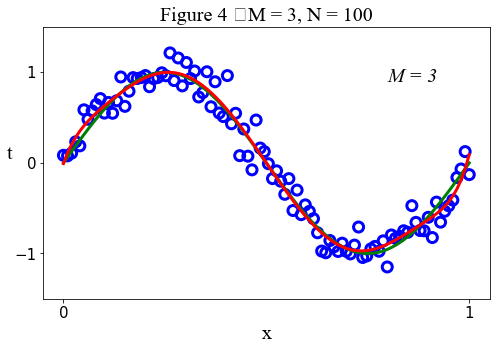

In [66]:
N=100
x_N, t_N = get_data(N)
p = regress(9, N, x, x_N,t_N)
plt.figure(2, figsize=(8,5))
#画两条曲线

plt.plot(x,t,'green',x,p,'red',linewidth=3)
#散点，将原始训练数据显示出
plt.scatter(x_N,t_N,color='',marker='o',edgecolors='b', s=100,linewidths=3, label='training data')
draw_ticks()
plt.title('Figure 4 ：M = 3, N = {}'.format(N), font)
plt.text(0.8,0.9,'M = 3', font, style='italic')
plt.savefig('4.png', dpi = 400)

ddd
------M=9, N=10-------
W:
[ 2.34352056e-02  9.03995699e+00 -2.14243470e+01  2.65003213e+01
 -1.02563138e+02  1.07549374e+02  9.50027831e+01 -8.60324408e+01
 -1.30294968e+02  1.02473886e+02]


C:\Users\a\AppData\Local\conda\conda\envs\test_py3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\a\AppData\Local\conda\conda\envs\test_py3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 65306 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\a\AppData\Local\conda\conda\envs\test_py3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 65306 missing from current font.
  font.set_text(s, 0, flags=flags)


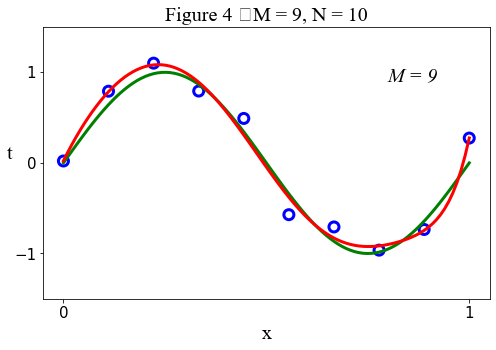

In [67]:
#通过正则化改善过拟合现象
N=10
x_N, t_N = get_data(N)
p = regress(9, N, x, x_N,t_N,np.exp(-18))
plt.figure(2, figsize=(8,5))
#画两条曲线

plt.plot(x,t,'green',x,p,'red',linewidth=3)
#散点，将原始训练数据显示出
plt.scatter(x_N,t_N,color='',marker='o',edgecolors='b', s=100,linewidths=3, label='training data')
draw_ticks()
plt.title('Figure 4 ：M = 9, N = {}'.format(N), font)
plt.text(0.8,0.9,'M = 9', font, style='italic')
plt.savefig('5.png', dpi = 400)